In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [44]:
loans = pd.read_csv("/home/tarsojabbes/Downloads/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv")

In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [47]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


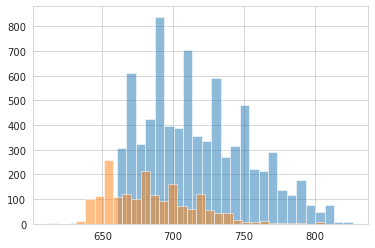

In [48]:
sns.set_style("whitegrid")
loans[loans["credit.policy"]==1]["fico"].hist(alpha=0.5, bins=30, label="credit.police = 1")
loans[loans["credit.policy"]==0]["fico"].hist(alpha=0.5, bins=30, label="credit.police = 0")

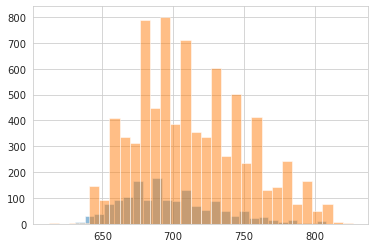

In [49]:
loans[loans["not.fully.paid"]==1]["fico"].hist(alpha=0.5, bins=30)
loans[loans["not.fully.paid"]==0]["fico"].hist(alpha=0.5, bins=30)

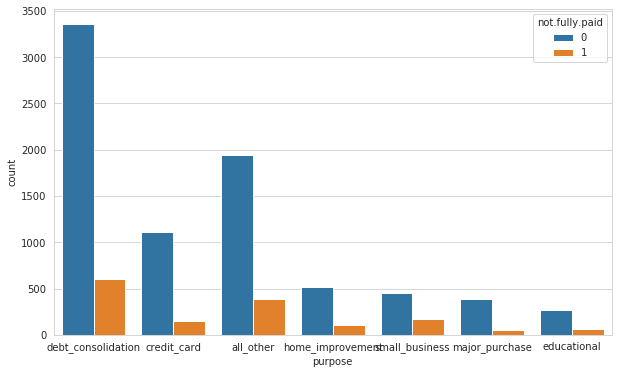

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x=loans["purpose"], hue=loans["not.fully.paid"])

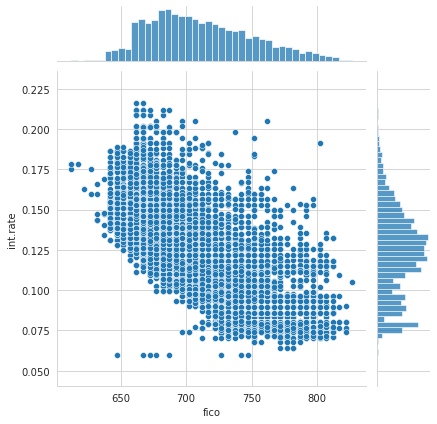

In [51]:
sns.jointplot(x=loans["fico"], y=loans["int.rate"])

In [52]:
cat_feats = ['purpose']

In [54]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [40]:
from sklearn.model_selection import train_test_split

In [55]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
predictions = dtree.predict(x_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1978  453]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier()

In [62]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
rfc_predictions = rfc.predict(x_test)

In [64]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[2418   13]
 [ 435    8]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.38      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874

